# i - Import Libraries
> Cell pertama pada notebook harus berisi dan hanya berisi semua library yang digunakan dalam project.

In [1]:
# Buat memproses data
import pandas as pd
import numpy as np

# Buat memproses grafik
import seaborn as sns
import matplotlib.pyplot as plt

# Buat feature engineering
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OrdinalEncoder

# Buat definisi model
from sklearn.linear_model import LinearRegression

# Buat evaluasi model
from sklearn.metrics import mean_absolute_error

# Buat import hasil model
import json
import pickle

# ii - Data Loading
> Bagian ini berisi proses penyiapan data sebelum dilakukan eksplorasi data lebih lanjut. Proses Data Loading dapat berupa memberi nama baru untuk setiap kolom, mengecek ukuran dataset, dll.

In [2]:
# Load Dataset

data = pd.read_csv ("Car Price.csv")
data

,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,Audi,A4,2019,26695,Semi-Auto,5000,Diesel,145,51.4,2.0
1,Mercedez,C Class,2010,5999,Manual,68000,Diesel,145,56.5,2.1
2,Vauxhall,Meriva,2016,6790,Manual,27772,Petrol,145,47.1,1.4
3,VW,Shuttle,2019,28000,Semi-Auto,10074,Diesel,145,32.8,2.0
4,Vauxhall,Corsa,2017,7999,Manual,22322,Petrol,30,54.3,1.4
...,...,...,...,...,...,...,...,...,...,...
23995,BMW,X3,2019,31950,Semi-Auto,7721,Diesel,145,54.3,2.0
23996,Audi,Q2,2018,20500,Automatic,6734,Diesel,145,46.3,1.6
23997,Hyundai,Tucson,2019,17490,Manual,8009,Petrol,145,34.9,1.6
23998,Vauxhall,Corsa,2013,3998,Manual,58350,Petrol,125,51.4,1.2


In [367]:
# Mengecek data - 1

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24000 entries, 0 to 23999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   brand         24000 non-null  object 
 1   model         24000 non-null  object 
 2   year          24000 non-null  int64  
 3   price         24000 non-null  int64  
 4   transmission  24000 non-null  object 
 5   mileage       24000 non-null  int64  
 6   fuelType      24000 non-null  object 
 7   tax           24000 non-null  int64  
 8   mpg           24000 non-null  float64
 9   engineSize    24000 non-null  float64
dtypes: float64(2), int64(4), object(4)
memory usage: 1.8+ MB


In [368]:
# Mengecek data - 2

data.describe()

,year,price,mileage,tax,mpg,engineSize
count,24000.000000,24000.000000,24000.000000,24000.000000,24000.000000,24000.000000
mean,2017.172000,17154.666208,22677.318208,122.455625,54.513126,1.676517
std,2.072139,9904.741481,20898.280371,60.220629,16.420648,0.552661
min,1970.000000,495.000000,1.000000,0.000000,1.100000,0.000000
25%,2016.000000,10390.000000,6981.250000,125.000000,45.600000,1.400000
50%,2017.000000,14995.000000,17155.000000,145.000000,54.300000,1.600000
75%,2019.000000,21286.250000,32093.500000,145.000000,61.400000,2.000000
max,2060.000000,140319.000000,300000.000000,580.000000,470.800000,6.200000


# iii - Exploratory Data Analysis (EDA)
> Bagian ini berisi eksplorasi data pada dataset diatas dengan menggunakan query, grouping, visualisasi sederhana, dan lain sebagainya.

## Nomor 1
> Informasi yang diberikan dibawah ini adalah jenis mobil bekas berdasarkan konsumsi bahan bakar berbanding dengan jarak. Urutkan dari jumlah jenis terbanyak hingga terkecil.



In [369]:
super_efficient = data.query ("mpg >= 60")
efficient = data.query ("50 <= mpg < 60")
decent = data.query ("35 <= mpg <50")
standard = data.query ("25 <= mpg <35")
not_efficient = data.query ("mpg < 25")

jumlah_super_efficient = len(super_efficient)
jumlah_efficient = len(efficient)
jumlah_decent = len(decent)
jumlah_standard = len(standard)
jumlah_not_efficient = len(not_efficient)

Hasil = {
    'super efficient' : jumlah_super_efficient,
    'efficient' : jumlah_efficient,
    'decent' : jumlah_decent,
    'standard' : jumlah_standard,
    'not_efficient' : jumlah_not_efficient
}

Jumlah_Jenis = sorted(Hasil.items(), key=lambda x:x[1], reverse=True)


for Kategori, count in Jumlah_Jenis:
  print(Kategori, 'berjumlah :', count)

super efficient berjumlah : 8091
decent berjumlah : 7677
efficient berjumlah : 7048
standard berjumlah : 1122
not_efficient berjumlah : 62


Text(0.5, 1.0, 'Kategori berdasarkan mpg')

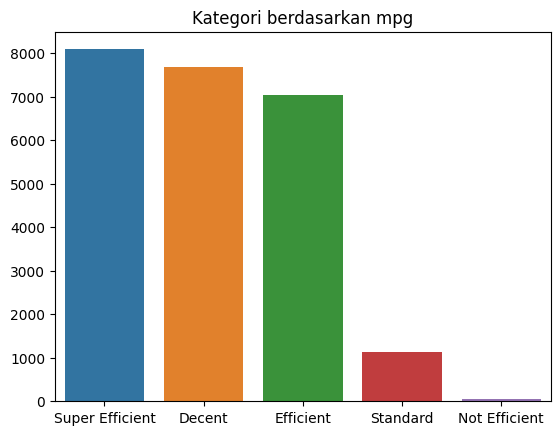

In [370]:
sns.barplot(x=['Super Efficient', 'Decent', 'Efficient', 'Standard', 'Not Efficient'],
            y=[jumlah_super_efficient, jumlah_decent, jumlah_efficient, jumlah_standard, jumlah_not_efficient])
plt.title ('Kategori berdasarkan mpg')

## Nomor 2
> harga mobil bekas (price) akan berpengaruh terhadap jarak tempuhnya (mileage) terlepas apapun jenis bahan bakar (fuelType) mobil tersebut

> Periksa apakah statement tersebut berlaku pada kasus ini atau tidak dengan visualisasi yang menunjukkan keterkaitan tiga hal ini pada satu plot yang sama ! Narasikan dengan bahasa Anda sendiri

<function matplotlib.pyplot.show(close=None, block=None)>

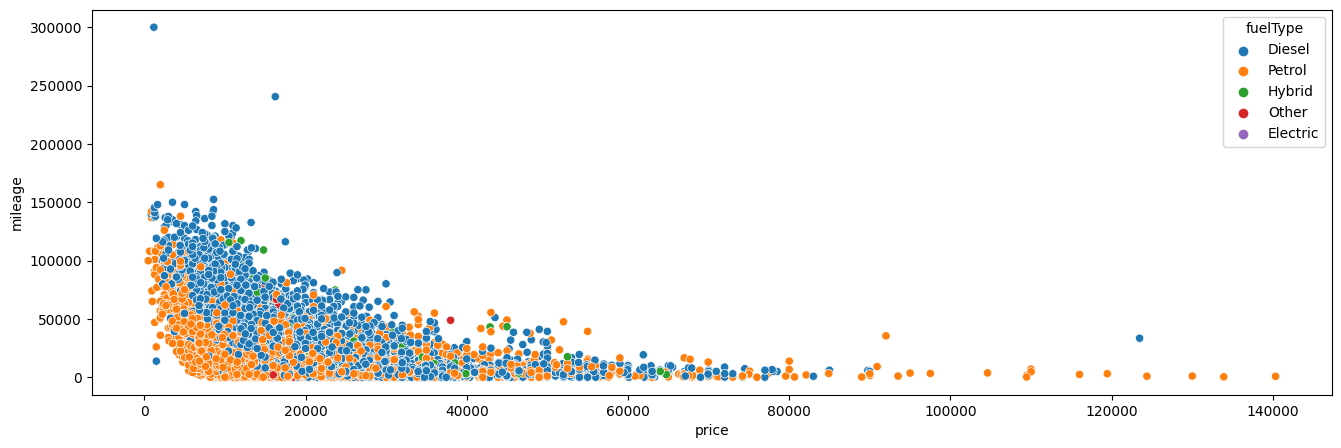

In [371]:
plt.figure(figsize=(16,5))
sns.scatterplot(x='price', y='mileage', data=data, hue='fuelType')
plt.show

Berdasarkan visualisasi diatas, hubungan antara `price`, `mileage`, dan `fueltype` tidak berhubungan, pada `fueltype` yang sama dan `mileage` yang sama memiliki `price` yang berbeda-beda, berlaku dengan yang lainnya, sehingga dapat disimpulkan bahwa dari ketiga data tersebut tidak memiliki korelasi

# iv - Feature Engineering
>Bagian ini berisi proses penyiapan data untuk proses pelatihan model, seperti pembagian data menjadi train-test, transformasi data (normalisasi, encoding, dll.), dan proses-proses lain yang dibutuhkan.

## Membagi antara X (features) dengan y (Target)

In [372]:
X = data.drop (['price'], axis=1)
y = data ['price']

print (X.shape)
print (y.shape)

(24000, 9)
(24000,)


## Membagi antara Train-set dan Test-Set

In [373]:
X_train, X_test, y_train, y_test = train_test_split (X, y, test_size=0.2, random_state=3)

print ('Train Size: ', X_train.shape)
print ('Test Size :', X_test.shape)

X_train

Train Size:  (19200, 9)
Test Size : (4800, 9)


,brand,model,year,transmission,mileage,fuelType,tax,mpg,engineSize
6922,Audi,Q5,2020,Semi-Auto,6500,Petrol,145,32.1,2.0
15656,Ford,Fiesta,2013,Manual,52484,Petrol,30,54.3,1.2
14771,Audi,A3,2015,Manual,84000,Diesel,20,68.9,2.0
20168,Hyundai,I10,2015,Manual,19645,Petrol,30,57.6,1.2
21439,BMW,3 Series,2018,Manual,19041,Diesel,145,67.3,2.0
...,...,...,...,...,...,...,...,...,...
6400,Audi,Q5,2016,Automatic,74896,Diesel,235,42.2,3.0
15288,BMW,2 Series,2017,Manual,15926,Diesel,150,62.8,1.5
11513,Audi,Q5,2020,Semi-Auto,6000,Diesel,150,38.2,2.0
1688,Skoda,Kodiaq,2018,Automatic,15218,Petrol,145,38.2,2.0


## Handle Missing Values

Mengecek adanya missing values pada setiap data

### X_train

In [374]:
X_train.isnull().sum()

brand           0
model           0
year            0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
dtype: int64

### X_test

In [375]:
X_test.isnull().sum()

brand           0
model           0
year            0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
dtype: int64

### y_train

In [376]:
y_train.isnull().sum()

0

### y_test

In [377]:
y_test.isnull().sum()

0

Berdasarkan hasil diatas, tidak ditemukannya data missing values

## Handle Outlier

skewness Value:  2.29


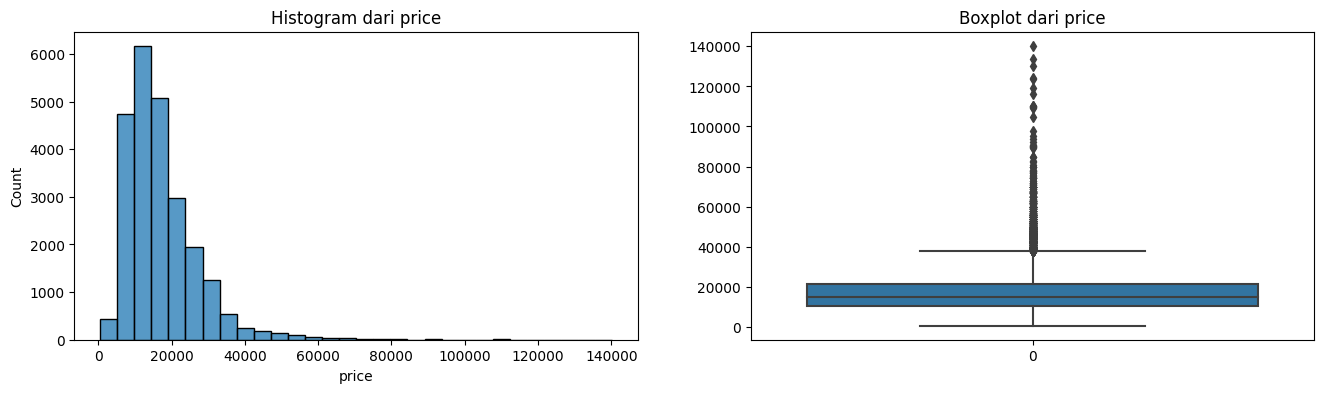

In [378]:
print ('skewness Value: ', data['price'].skew().round(decimals=2))

plt.figure(figsize=(16, 4))

# Histogram
plt.subplot(1, 2, 1)
sns.histplot(data['price'], bins=30)
plt.title('Histogram dari price')

# Boxplot
plt.subplot(1, 2, 2)
sns.boxplot(data['price'])
plt.title('Boxplot dari price')

plt.show()

Terlihat bahwa nilai skewnessnya tinggi, mencerminkan bahwa data tersebut merupakan highly skewed.

### Membuat outlier

In [379]:
# Membuat batas atas dan bawah outlier
upper_boundary = data['price'].mean() + 1.5 * data['price'].std()
lower_boundary = data['price'].mean() - 1.5 * data['price'].std()

upper_boundary, lower_boundary

(32011.778429158723, 2297.553987507943)

In [380]:
# Melihat data
print('Total price         : {}'.format(len(data['price'])))
print('price didalam boundary : {}'.format(len(data[(data['price'] > lower_boundary) & (data['price'] < upper_boundary)])))
print('price diluar boundary : {}'.format(len(data[(data['price'] > upper_boundary) | (data['price'] < lower_boundary)])))
print('')
print('% price diluar boundary : {}'.format(len(data[(data['price'] > upper_boundary) | (data['price'] < lower_boundary)]) / len(data) * 100))

Total price         : 24000
price didalam boundary : 22367
price diluar boundary : 1633

% price diluar boundary : 6.804166666666667


### Trimming

In [381]:
# Mengambil nilai didalam outlier
y_train = y_train[(y_train > lower_boundary) & (y_train < upper_boundary)]
print(y_train.shape)

(17894,)


skewness Value:  0.56


Text(0.5, 1.0, 'Histogram dari price')

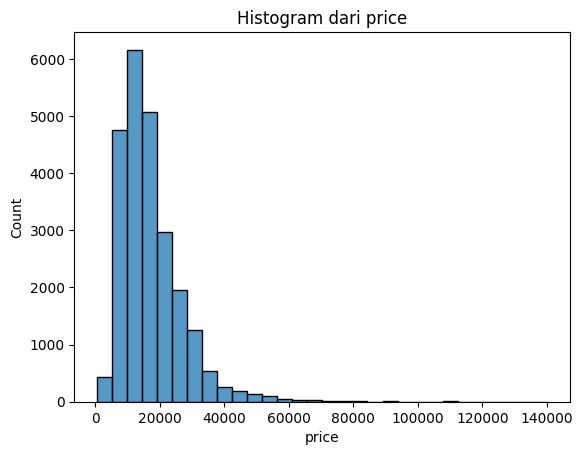

In [382]:
print ('skewness Value: ', y_train.skew().round(decimals=2))

sns.histplot(data['price'], bins=30)
plt.title('Histogram dari price')

Setelah dilakukannya outlier, nilai skewnessnya mengecil, tetapi masih tergolong skew sedang.

## Feature Selection

### Membuang data outlier
Membuang data outlier seperti pada data y_train

In [383]:
X_train = X_train.filter(items=y_train.index,axis=0)

print(X_train.shape)

(17894, 9)


### Drop kolom model
Anggapan penulis adalah tidak ada kaitannya antara `model` dengan `price`


In [384]:
X_train.drop ('model', axis=1, inplace=True)
X_test.drop('model', axis=1, inplace=True)

X_train

,brand,year,transmission,mileage,fuelType,tax,mpg,engineSize
15656,Ford,2013,Manual,52484,Petrol,30,54.3,1.2
14771,Audi,2015,Manual,84000,Diesel,20,68.9,2.0
20168,Hyundai,2015,Manual,19645,Petrol,30,57.6,1.2
21439,BMW,2018,Manual,19041,Diesel,145,67.3,2.0
9918,Hyundai,2019,Manual,9893,Petrol,145,44.1,1.0
...,...,...,...,...,...,...,...,...
19091,Vauxhall,2017,Manual,20597,Diesel,145,54.3,2.0
6400,Audi,2016,Automatic,74896,Diesel,235,42.2,3.0
15288,BMW,2017,Manual,15926,Diesel,150,62.8,1.5
1688,Skoda,2018,Automatic,15218,Petrol,145,38.2,2.0


## Memisahkan kolom numeric dengan category

In [385]:
num_columns = X_train.select_dtypes(include=np.number).columns.tolist()
cat_columns = X_train.select_dtypes(exclude=np.number).columns.tolist()

print('Num Columns : ', num_columns)
print('Cat Columns : ', cat_columns)

Num Columns :  ['year', 'mileage', 'tax', 'mpg', 'engineSize']
Cat Columns :  ['brand', 'transmission', 'fuelType']


### Memisahkan pada X_train dan X_test



In [386]:
X_train_num = X_train[num_columns]
X_train_cat = X_train[cat_columns]

X_test_num = X_test[num_columns]
X_test_cat = X_test[cat_columns]

In [387]:
X_train_num

,year,mileage,tax,mpg,engineSize
15656,2013,52484,30,54.3,1.2
14771,2015,84000,20,68.9,2.0
20168,2015,19645,30,57.6,1.2
21439,2018,19041,145,67.3,2.0
9918,2019,9893,145,44.1,1.0
...,...,...,...,...,...
19091,2017,20597,145,54.3,2.0
6400,2016,74896,235,42.2,3.0
15288,2017,15926,150,62.8,1.5
1688,2018,15218,145,38.2,2.0


In [388]:
X_test_cat

,brand,transmission,fuelType
18233,BMW,Automatic,Diesel
8844,Audi,Automatic,Petrol
18415,Mercedez,Semi-Auto,Petrol
4324,Hyundai,Manual,Diesel
11210,Ford,Manual,Diesel
...,...,...,...
15573,Ford,Manual,Diesel
19261,Mercedez,Automatic,Diesel
2505,Vauxhall,Manual,Petrol
12018,Mercedez,Automatic,Diesel


## Feature Scaling

### Scaling menggunakan MinMaxScaler



In [389]:
scaler = MinMaxScaler()
scaler.fit(X_train_num)

X_train_num_scaled = scaler.transform(X_train_num)
X_test_num_scaled = scaler.transform(X_test_num)
X_train_num_scaled

array([[0.47777778, 0.21823088, 0.05172414, 0.11326379, 0.19354839],
       [0.5       , 0.34927836, 0.03448276, 0.14434746, 0.32258065],
       [0.5       , 0.08168221, 0.05172414, 0.12028955, 0.19354839],
       ...,
       [0.52222222, 0.06621814, 0.25862069, 0.13136044, 0.24193548],
       [0.53333333, 0.06327419, 0.25      , 0.07898659, 0.32258065],
       [0.5       , 0.16952676, 0.05172414, 0.12837982, 0.32258065]])

## Feature Encoding

In [390]:
# Membuat encoder menggunakan OrdinalEncoder
encoder = OrdinalEncoder(categories=[['Ford', 'Audi', 'Hyundai', 'BMW', 'Vauxhall','VW', 'Mercedez', 'Skoda'], # brand
                                     ['Manual', 'Automatic', 'Other', 'Semi-Auto'],                            # transmission
                                     ['Petrol', 'Diesel', 'Other', 'Hybrid', 'Electric']])                     # fuelType
encoder.fit(X_train_cat)

X_train_cat_encoded = encoder.transform(X_train_cat)
X_test_cat_encoded = encoder.transform(X_test_cat)

X_train_cat_encoded

array([[0., 0., 0.],
       [1., 0., 1.],
       [2., 0., 0.],
       ...,
       [3., 0., 1.],
       [7., 1., 0.],
       [7., 0., 1.]])

## Menggabung antara numeric dengan category

In [391]:
X_train_final = np.concatenate([X_train_num_scaled, X_train_cat_encoded], axis=1) # Gabung pada X_train
X_test_final = np.concatenate([X_test_num_scaled, X_test_cat_encoded], axis=1)    # Gabung pada X_test
X_train_final

array([[0.47777778, 0.21823088, 0.05172414, ..., 0.        , 0.        ,
        0.        ],
       [0.5       , 0.34927836, 0.03448276, ..., 1.        , 0.        ,
        1.        ],
       [0.5       , 0.08168221, 0.05172414, ..., 2.        , 0.        ,
        0.        ],
       ...,
       [0.52222222, 0.06621814, 0.25862069, ..., 3.        , 0.        ,
        1.        ],
       [0.53333333, 0.06327419, 0.25      , ..., 7.        , 1.        ,
        0.        ],
       [0.5       , 0.16952676, 0.05172414, ..., 7.        , 0.        ,
        1.        ]])

In [392]:
# Membuat dataframe `X_train_final`
X_train_final_df = pd.DataFrame(X_train_final, columns=[num_columns + cat_columns])
X_train_final_df

,year,mileage,tax,mpg,engineSize,brand,transmission,fuelType
0,0.477778,0.218231,0.051724,0.113264,0.193548,0.0,0.0,0.0
1,0.500000,0.349278,0.034483,0.144347,0.322581,1.0,0.0,1.0
2,0.500000,0.081682,0.051724,0.120290,0.193548,2.0,0.0,0.0
3,0.533333,0.079171,0.250000,0.140941,0.322581,3.0,0.0,1.0
4,0.544444,0.041132,0.250000,0.091548,0.161290,2.0,0.0,0.0
...,...,...,...,...,...,...,...,...
17889,0.522222,0.085641,0.250000,0.113264,0.322581,4.0,0.0,1.0
17890,0.511111,0.311423,0.405172,0.087503,0.483871,1.0,1.0,1.0
17891,0.522222,0.066218,0.258621,0.131360,0.241935,3.0,0.0,1.0
17892,0.533333,0.063274,0.250000,0.078987,0.322581,7.0,1.0,0.0


# v - Model Definition
> Bagian ini berisi cell untuk mendefinisikan model. Jelaskan alasan menggunakan suatu algoritma/model, hyperparameter yang dipakai, jenis penggunaan metrics yang dipakai, dan hal lain yang terkait dengan model.

In [393]:
model_lin_reg = LinearRegression() # Membuat fungsi dari LinearRegression

* Menggunakan Linear Regression karena berdasarkan grafik Nomor 2, `price` akan
 tinggi apabila `mileage` rendah, sehingga dapat digunakan linear
* Menggunakan Mean Absolute Error (MAE) karena mengukur rata-rata dari selisih absolut antara nilai train dengan test

# vi - Model Training
> Cell pada bagian ini hanya berisi code untuk melatih model dan output yang dihasilkan. Lakukan beberapa kali proses training dengan hyperparameter yang berbeda untuk melihat hasil yang didapatkan. Analisis dan narasikan hasil ini pada bagian Model Evaluation.

In [394]:
model_lin_reg.fit(X_train_final, y_train) # Membuat model

LinearRegression()

# vii - Model Evaluation
>Pada bagian ini, dilakukan evaluasi model yang harus menunjukkan bagaimana performa model berdasarkan metrics yang dipilih. Hal ini harus dibuktikan dengan visualisasi tren performa dan/atau tingkat kesalahan model. Lakukan analisis terkait dengan hasil pada model dan tuliskan hasil analisisnya.

In [395]:
# Predict Train-Set and Test-Set

y_pred_train = model_lin_reg.predict(X_train_final)
y_pred_test = model_lin_reg.predict(X_test_final)
y_pred_train

array([ 3431.64757277,  9180.95245812,  8389.78405905, ...,
       14584.63504368, 19812.10028192, 12556.89570007])

In [396]:
# Model Evaluation using MAE

from sklearn.metrics import mean_absolute_error

print('Error - Train Set : ', mean_absolute_error(y_train, y_pred_train))
print('Error - Test Set : ', mean_absolute_error(y_test, y_pred_test))

Error - Train Set :  2716.7141057416343
Error - Test Set :  3532.607721024851


Model tersebut tergolong under-fit, karena nilai Train yang lebih rendah dibandingkan nilai Test




# viii - Model Saving
>Pada bagian ini, dilakukan proses penyimpanan model dan file-file lain yang terkait dengan hasil proses pembuatan model.

In [397]:
# Save the Files

with open('list_num_cols.txt', 'w') as file_1:
  json.dump(num_columns, file_1)

with open('list_cat_cols.txt', 'w') as file_2:
  json.dump(cat_columns, file_2)

with open('model_scaler.pkl', 'wb') as file_3:
  pickle.dump(scaler, file_3)

with open('model_encoder.pkl', 'wb') as file_4:
  pickle.dump(encoder, file_4)

with open('model_lin_reg.pkl', 'wb') as file_5:
  pickle.dump(model_lin_reg, file_5)

# ix - Model Inference
> Model yang sudah dilatih akan dicoba pada data yang bukan termasuk ke dalam train-set ataupun test-set. Data ini harus dalam format yang asli, bukan data yang sudah di-scaled.

In [398]:
# Load All Files

with open('model_lin_reg.pkl', 'rb') as file_1:
  model_lin_reg = pickle.load(file_1)

with open('model_scaler.pkl', 'rb') as file_2:
  model_scaler = pickle.load(file_2)

with open('model_encoder.pkl','rb') as file_3:
  model_encoder = pickle.load(file_3)

with open('list_num_cols.txt', 'r') as file_4:
  list_num_cols = json.load(file_4)

with open('list_cat_cols.txt', 'r') as file_5:
  list_cat_cols = json.load(file_5)

In [399]:
data_inf = {
    'brand'        : 'Audi',
    'model'        : 'Q5',
    'year'         : 2020,
    'transmission' : 'Automatic',
    'mileage'      : 15000,
    'fuelType'     : 'Electric',
    'tax'          : 0,
    'mpg'          : 70,
    'engineSize'   : 2.0
}

data_inf = pd.DataFrame([data_inf])
data_inf

,brand,model,year,transmission,mileage,fuelType,tax,mpg,engineSize
0,Audi,Q5,2020,Automatic,15000,Electric,0,70,2.0


In [400]:
# Split between Numerical Columns and Categorical Columns

data_inf_num = data_inf[list_num_cols]
data_inf_cat = data_inf[list_cat_cols]
data_inf_num

,year,mileage,tax,mpg,engineSize
0,2020,15000,0,70,2.0


In [401]:
# Feature Scaling and Feature Encoding

data_inf_num_scaled = model_scaler.transform(data_inf_num)
data_inf_cat_encoded = model_encoder.transform(data_inf_cat)
data_inf_final = np.concatenate([data_inf_num_scaled, data_inf_cat_encoded], axis=1)

In [402]:
# Predict using Linear Regression

y_pred_inf = model_lin_reg.predict(data_inf_final)
y_pred_inf

array([25069.78573115])

# x - Pengambilan Kesimpulan
> Pada bagian terakhir ini, harus berisi kesimpulan yang mencerminkan hasil yang didapat dengan objective yang sudah ditulis di bagian pengenalan.

Berdasarkan hasil pengerjaan, dapat disimpulkan bahwa:
1. Dari EDA terlihat bahwa kategori mpg yang terbanyak adalah `supper efficient` dan paling sedikit adalah `not efficient`, sedangkan pada hubungan antara `price`, `mileage`, dan `fueltype` tidak memiliki korelasi.
2. Dari Model Evaluation bahwa model tersebut tergolong under-fit, karena nilai Train yang lebih rendah dibandingkan nilai Test
3. Saat menggunakan data inferencing, memiliki hasil prediksi harga mobil `25069.78`


